In [1]:
import os

import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Importing Data

pandas has functions such as **`read_csv, read_table, read_fwf`** and **`read_clipboard`** for reading tabular data as a DataFrame object. These functions take as arguments the following options:

* Which columns to consider?   
    * Import the header (`header=None`) or provide column names (`names=`)

* Type inference and conversion
    * Processing dates, combining date and time

* Which column serves as the index? (`index_col=`)
    * For a hierarchical index, pass a list of column names
    
* Which values to interpret as missing data (`na_values=`)
    * If there are multiple sentinels for missing data, pass a dictionary

* If the file is too large, read chunks iteratively (`nrows=` and `chunksize=`)

* Skipping over rows/footer (`skiprows=`)

* Interpreting decimal numbers (points or commas to mark thousands)

In [2]:
os.getcwd()
path = os.getcwd()

In [3]:
titanic = pd.read_csv(path + '/train.csv')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
pd.merge?

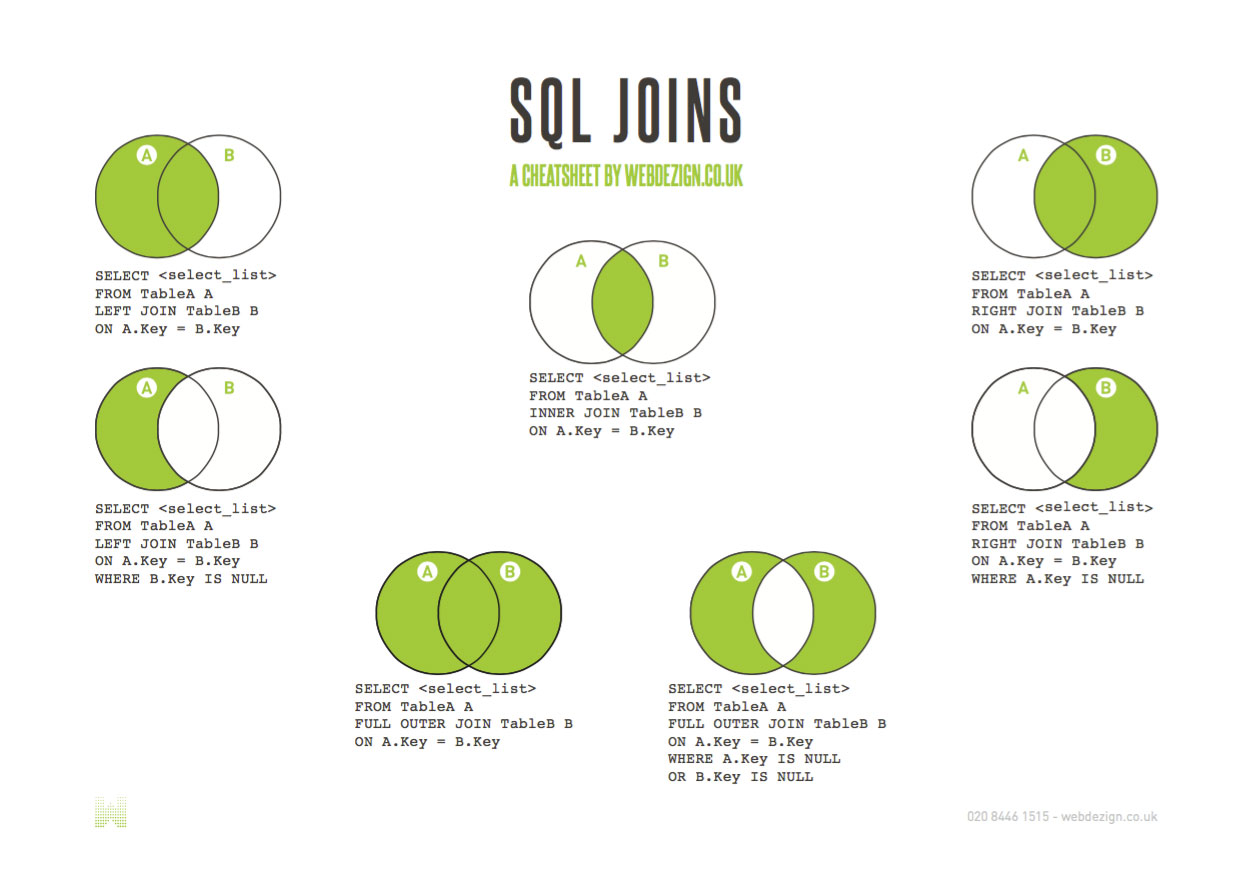

In [5]:
from IPython.display import Image
Image("https://adiyatmubarak.files.wordpress.com/2016/01/sql.jpg")


# 7.1 Merge
pandas.merge is similar to the _SQL join_ operations; it links rows of tables using one or more _keys_

Syntax:

`merge(df1, df2, 
       how='left', on='key', left_on=None, right_on=None, 
       left_index=False, right_index=False, 
       sort=True, copy=True,
       suffixes=('_x', '_y'))`


The syntax includes specifications of the following arguments

* **Which column to merge on;** 
    * the `on='key'` if the same key is in the two DFs, 
    * or `left_on='lkey', right_on='rkey'` if the keys have different names in the DFs 
    * Note: To merge on multiple keys, pass a list of column names
 
 
* **The nature of the join;** 
    * the `how=` option, with `left`, `right`, `outer`
    * By default, the merge is an `inner` join
    
 
* Tuple of string values to append to **overlapping column names** to identify them in the merged dataset
    * the `suffixes=` option
    * defaults to `('_x', '_y')`
    
 
* If you wish **to merge on the DF index**, pass `left_index=True` or `right_index=True` or both.


* Sort the result DataFrame by the join keys in lexicographical order or not;
    * `sort=` option; Defaults to True, setting to False will improve performance substantially in many cases
    
    
    
> _Note:_ For the **official Documentation** refer http://pandas.pydata.org/pandas-docs/dev/merging.html

In [6]:
# Let's define a few toy datasets to use as examples

df0 = DataFrame({'key': ['a', 'b', 'c', 'd', 'e'], 'data0': np.random.randint(0, 100, 5)})
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': np.random.randint(0, 100, 7)})
df2 = DataFrame({'key': ['a', 'b', 'd', 'f', 'g'], 'data2': np.random.randint(0, 100, 5)})

df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data3': np.random.randint(0, 100, 7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'], 'data4': np.random.randint(0, 100, 3)})

print df0, '\n\n', df1, '\n\n', df2, '\n\n', df3, '\n\n', df4

   data0 key
0      1   a
1     55   b
2      5   c
3     59   d
4     67   e 

   data1 key
0     29   b
1     39   b
2     26   a
3     39   c
4     91   a
5     39   a
6     43   b 

   data2 key
0     86   a
1     85   b
2     25   d
3     98   f
4      8   g 

   data3 lkey
0     29    b
1     16    b
2     60    a
3     22    c
4     81    a
5     28    a
6     95    b 

   data4 rkey
0     23    a
1     48    b
2     84    d


In [9]:
# 1. Default merge with no parameters

print pd.merge(df0, df2)
# We see that its an inner join by default (output key is the intersection of input keys)
# Merge happens on the column 'key' which is common to both datasets;
    # We could've written pd.merge(df1, df2, on='key', how='inner') to the same effect

   data0 key  data2
0      1   a     86
1     55   b     85
2     59   d     25


In [10]:
# Outer Join
print pd.merge(df0, df2, how='outer')

   data0 key  data2
0    1.0   a   86.0
1   55.0   b   85.0
2    5.0   c    NaN
3   59.0   d   25.0
4   67.0   e    NaN
5    NaN   f   98.0
6    NaN   g    8.0


In [ ]:
pd.merge(df1, df4) 
# would yield an error because there are no matching column names to merge on 

In [ ]:
# 2. Specifying which columns to merge on (if keys have different names in datasets)

pd.merge(df1, df4, left_on='key', right_on='rkey')
# still an inner join!

In [ ]:
# 3. Specifying which type of join: outer

pd.merge(df1, df2, how='outer')
# the merged dataset will have a union of the keys, imputing NaNs where values aren't found

In [ ]:
# 3.1 Try out a left join

pd.merge(df1, df2, how='left')
# value 'c' is absent in df2, so there will be a NaN in column data2

In [ ]:
# Add a column with the same name to df1 and df2
df1['colx'] = np.random.randn(7)
df2['colx'] = np.random.randn(5)

print df1
print '\n\n', df2, '\n\n'

In [ ]:
pd.merge(df1, df2, on='key', how='outer')

In [ ]:
# Specifying suffixes to identify columns with the same name
print pd.merge(df1, df2, on='key', suffixes=['_df1', '_df2'])

In [ ]:
df1['key2'] = list('xy' * 3 + 'z')
df2['key2'] = list('xy' * 2 + 'z')
print df1
print '\n\n', df2, '\n\n'

In [ ]:
print zip(df1.key, df1.key2)
print zip(df2.key, df2.key2)

In [ ]:
pd.merge(df1, df2, on=['key', 'key2'], suffixes=('_1', '_2'))

In [ ]:
# Set lkey to be the index of df3

df3.set_index('lkey', inplace=True)
print df3

# Note: Do this only once. Re-running set_index will produce errors. You'll have to reset index before you can set it again.

In [ ]:
df2

In [ ]:
# We specify that for the left df we will use the column called 'key' and for the right df, we will use its index to merge
pd.merge(df2, df3, how='left', left_on='key', right_index=True)

------------------------------------------------------------------------------------------------------------------------------

In [ ]:
print type(pd.merge)
print type(DataFrame.join)

In [ ]:
DataFrame.join?

### 7.2 The `.join()` method

.join is a convenient **DataFrame method** for combining many DataFrames objects with the same or similar indexes but non-overlapping columns into a single result DataFrame.

By default, the `join` method performs a _left join_ on the join keys.

For simple **index-on-index merges** we can pass a list of DataFrames to `join.`

In [ ]:
df = DataFrame(np.random.randint(0, 50, 32).reshape(8, 4), columns=list('WXYZ'), index=list('abcdefgh'))

df1 = df.ix[2:, ['W', 'X']]
df2 = df.ix[:5, ['Y', 'Z']]

print df, '\n\n', df1, '\n\n', df2

In [ ]:
# Default actions is a left join on the indexes
df1.join(df2)

In [ ]:
pd.merge(df1, df2, how='left', 
         right_index=True, left_index=True)

In [ ]:
# We can alter the nature of the join by passing how=
df1.join(df2, how='outer')

In [ ]:
pd.merge(df1, df2, how='outer', right_index=True, left_index=True)

In [ ]:
%timeit df1.join(df2, how='outer')

In [ ]:
%timeit pd.merge(df1, df2, how='outer', right_index=True, left_index=True)

In [ ]:
# Create a couple more DFs with the same index
df3 = df.ix[0:3, ['X', 'Z']]
df3.columns = ['P', 'Q']

df4 = df.ix[4:6, ['W']]
df4.columns = ['R']

print df3, "\n\n", df4

In [ ]:
print df1, '\n\n', df2

In [ ]:
# Merging multiple DFs with the same index by passing a list of names to .join
df1.join([df2, df3, df4])

In [ ]:
df2.join([df1, df3, df4], how='outer')

------------------------------------------------------------------------------------------------------------------------------

In [ ]:
pd.concat?

# 7.3 Concatenating DataFrames 
## - (aka binding, stacking, union all)

### a. Series objects with no index overlap
    * concat with axis=0 (default) will append the Series (~rbind)
    * concat with axis=1 will merge the Series to produce a DF (~outer join)

In [ ]:
# Create toy Series with non-overlapping indices
s1 = Series(np.random.randn(3), index=list('abc'), name='S1')
s2 = Series(np.random.randn(5), index=list('cdefg'), name='S2')
s3 = Series(np.random.randn(4), index=list('fghi'), name='S3')

print s1, '\n\n S2:\n', s2, '\n\n S3:\n', s3

In [ ]:
# Default action is to append the data
pd.concat([s1, s2, s3], axis=0)

In [ ]:
# concat with axis=1 (non-overlapping index)
print pd.concat([s1, s2, s3], axis=1).fillna(0)

### The `keys=` option

In [ ]:
# Passing keys= creates a hierarchical index when appending (axis=0)
pd.concat([s1, s2, s3], axis=0, keys=['one', 'two', 'thr'])

In [ ]:
# Passing keys= gives names to columns when using axis=1
print pd.concat([s1, s2, s3], axis=1, keys=['S1', 'S2', 'S3'])

### b. Series objects with overlapping index

* If there is an overlap on indexes, we can specify **`join=`** to intersect the data
    * Note that the `join=` option takes only `'inner'` and `'outer'`

In [ ]:
s4 = Series(np.random.randn(5), index=list('abcde'), name='S4')
print s4

In [ ]:
s1

In [ ]:
# concat with overlapping index (default join type is outer)
print pd.concat([s1, s4], axis=1)

In [ ]:
# if we specify a join type, this will be equivalent to a merge
print pd.concat([s1, s4], axis=1, join='inner')

### c. DataFrame objects

The same logic extends here

In [ ]:
# Create toy dataframes with non-overlapping indexes
df1 = DataFrame(np.random.randn(3, 3), index=list('abc'), columns=list('XYZ')) 
df2 = DataFrame(np.random.randn(2, 2), index=list('pq'), columns=list('XZ'))
print df1, '\n\n', df2

In [ ]:
# No overlapping index
print 'When axis=0 \n'
print pd.concat([df1, df2], axis=0)

In [ ]:
print '\n When axis=1 \n'
print pd.concat([df1, df2], axis=1)

### NEVER DO THIS.

In [ ]:
# Create toy dataframes with overlapping indexes
df1 = DataFrame(np.random.randn(9).reshape(3, 3), index=list('abc'), columns=list('XYZ')) 
df2 = DataFrame(np.random.randn(4).reshape(2, 2), index=list('ac'), columns=list('XZ'))
print df1, '\n\n', df2

# When axis=0 there will still be 
pd.concat([df1, df2])

In [ ]:
# Overlapping indexes will be merged
pd.concat([df1, df2], axis=1)

In [ ]:
pd.concat([df1, df2], axis=1, keys=['df_1', 'df_2'])
# This will create a hierarchical index

------------------------------------------------------------------------------------------------------------------------------

# 7.4 $Reshaping$ using `stack()` and `unstack()`

Hierarchical Indexing provides a convenient way to reshape data;
    * `stack` pivots the columns into rows
    * `unstack` pivots rows into columns



In [ ]:
# Create a toy DF with a Hierarchical Index
tuples = zip(list('AB'*2), list('CDEF'))
multix = pd.MultiIndex.from_tuples(tuples, names=['one', 'two'])

df = DataFrame(np.random.randn(4, 4), index=multix, columns=list('WXYZ'))
print df

In [ ]:
df.stack()
# 1 column

In [ ]:
stacked = df.stack()
print stacked

In [ ]:
unstacked = stacked.unstack()
print unstacked

-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
print type(DataFrame.pivot)
print type(pd.pivot_table)

In [ ]:
DataFrame.pivot?

In [ ]:
pd.pivot_table?

# 7.5 Converting data from 'long' to 'wide' format using `.pivot()`

Usually, for convenience, data in relational DB is stored in the **long format**
    * fewer columns, label duplication in keys

For certain kinds of analysis, we might prefer to have the data in the **wide format **
    * more columns, unique labels in keys

The `df.pivot()` method takes the names of columns to be used as row (`index=`) and column indexes (`columns=`) and a column to fill in the data as (`values=`)


In [ ]:
df = DataFrame({'date': (list(pd.date_range('2000-01-03', '2000-01-05')) * 4),
          'item': (list('ABCD'*3)),
          'status': (np.random.randn(12))})
print df

In [ ]:
print df.set_index(['date', 'item']).unstack()

In [ ]:
print df.pivot(index='date', columns='item', values='status')

In [ ]:
%timeit df.set_index(['date', 'item']).unstack()

In [ ]:
%timeit df.pivot(index='date', columns='item', values='status')

> Note: Pivot is just a convenient wrapper function that replaces the need to create a hierarchical index using `set_index` and reshaping with `stack`

In [ ]:
df_p = pd.concat([df, df.assign(status = lambda x: x['status'] * 2)])
print df_p

In [ ]:
print pd.pivot_table(data=df_p, 
               index='date', 
               columns='item', 
               values='status', 
               aggfunc=np.sum)

-----------------------------------------------------------------------------------------------------------------------------

# 7.6 $Transforming$ Data

## A. Removing Duplicates

* `df.duplicated()` Returns boolean Series denoting duplicate rows, optionally only considering certain columns
* `df.drop_duplicates()` Returns DataFrame with duplicate rows removed, optionally only considering certain columns


In [ ]:
df = DataFrame({'C1': list('ABC' * 2),
          'C2': [1, 2, 4, 3, 2, 4]})
print df

In [ ]:
print df.assign(Dups = df.duplicated())
# Creates a boolean series to indicate which rows have dups

In [ ]:
print df[df.duplicated()]
# Retain the rows that are duplicates

In [ ]:
print df[-df.duplicated()]

In [ ]:
print df.drop_duplicates()
# retain the first occurrence of each row (drop dups)

In [ ]:
print df.drop_duplicates(keep='last')
# retain the last occurrence of each row (drop dups)

In [ ]:
print df.drop_duplicates(keep=False)

### To find number of duplicated rows

In [ ]:
titanic.duplicated().value_counts()

In [ ]:
df.duplicated().value_counts()

> By default, these methods consider all of the columns. To specify a subset for detecting duplicates, use **`df.drop_duplicates(['list-of-columns'])`**

-----------------------------------------------------------------------------------------------------------------------------

## B. Performing a VLOOKUP

For adding a column based on the transformed values of an existing column (using a lookup table) involves calling the `.map()` method (for Series) which accepts a `dict` or a `function` and applies it to each value.

> Note: `.map()` is a convenient way to perform element-wise transformations and data cleaning operations.

In [11]:
df = DataFrame({'key': list('ABC' * 4),
               'val': np.random.randn(12)}); df

,key,val
0,A,0.022888
1,B,0.173098
2,C,-1.479196
3,A,-0.628073
4,B,0.953697
5,C,-1.176409
6,A,-1.171460
7,B,1.030869
8,C,0.478732
9,A,0.774155


In [13]:
lookup = {
    'A': 'Excellent',
    'B': 'Satisfactory',
    'C': 'Improve'
}

lookup

{'A': 'Excellent', 'B': 'Satisfactory', 'C': 'Improve'}

In [14]:
df['key'].map(lookup)

0        Excellent
1     Satisfactory
2          Improve
3        Excellent
4     Satisfactory
5          Improve
6        Excellent
7     Satisfactory
8          Improve
9        Excellent
10    Satisfactory
11         Improve
Name: key, dtype: object

In [ ]:
df['grade'] = df['key'].map(lookup)
df

In [ ]:
df['grade_2'] = df['key'].replace(lookup)

In [ ]:
%timeit df.key.replace(lookup)

In [ ]:
%timeit df.key.map(lookup)

## C. Replacing Values

To substitute certain values in a Series by a target-value, we can use the `.replace()` method,
specifying the find/replace (target/replacement) values as a list or a dict.

In [ ]:
s = Series(list('abc' * 3))

s

**Syntax: `my_series.replace(target-value, replace_by_this)`**


In [ ]:
s.replace('a', 'AA')

In [ ]:
s[::2] = np.nan

In [ ]:
s

In [ ]:
s.replace(np.nan, 'nan')

In [ ]:
s.fillna('nan')

---

In [ ]:
df_r = DataFrame(np.random.randint(0, 5, 25).reshape(5, 5), columns=list('ABCDE'))

In [ ]:
df_r.replace([0, 1, 2, 3, 4], ['zer','one', 'two', 'thr', 'four'])

In [ ]:
lookup = {0: 'zer', 
          1: 'one', 
          2: 'two', 
          3: 'thr', 
          4: 'fou'}

df_r.applymap(lambda x: lookup.get(x))

In [ ]:
%timeit df_r.replace([0, 1, 2, 3, 4], ['zer','one', 'two', 'thr', 'four'])

In [ ]:
%timeit df_r.applymap(lambda x: lookup[x])

-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
pd.cut?

## D. Binning Numeric Variables to Categoricals

The `pd.cut()` and `pd.qcut()` functions are used; they take as arguments the following;

* `var`, the continuous variable to discretize
* `bins`, specified as a number (equal sized bins will be computed based on min/max) or a list of bin edges
* `right=True`, a boolean to include the edge or not
* `labels=`, for naming the bins
* `precision=`



In [19]:
# Create a list of 20 integers between 1 and 100
var = np.random.randint(1, 100, 500)
print var[:10]

[47 57  8 99 53  2 40  3 69 81]


In [20]:
# Automatic Binning
pd.cut(var, 5)[:10]

[(40.2, 59.8], (40.2, 59.8], (0.902, 20.6], (79.4, 99], (40.2, 59.8], (0.902, 20.6], (20.6, 40.2], (0.902, 20.6], (59.8, 79.4], (79.4, 99]]
Categories (5, object): [(0.902, 20.6] < (20.6, 40.2] < (40.2, 59.8] < (59.8, 79.4] < (79.4, 99]]

In [21]:
var[:5]

array([47, 57,  8, 99, 53])

In [28]:
range(101, 0, -20)

[101, 81, 61, 41, 21, 1]

In [29]:
# Specifying bins manually
pd.cut(var, 
       bins=range(0, 101, 20), 
       labels = ['Bin_' + str(k) for k in range(1, 6)])

[Bin_3, Bin_3, Bin_1, Bin_5, Bin_3, ..., Bin_1, Bin_5, Bin_2, Bin_1, Bin_2]
Length: 500
Categories (5, object): [Bin_1 < Bin_2 < Bin_3 < Bin_4 < Bin_5]

In [12]:
pd.concat([Series(var[:10], name='Values'), 
           Series(pd.cut(var, 3, labels=['A', 'B', 'C'])[:10], name='Bins')], axis=1)

,Values,Bins
0,54,B
1,31,A
2,38,B
3,26,A
4,19,A
5,67,C
6,64,B
7,68,C
8,70,C
9,45,B


In [21]:
pd.cut(var, 3, labels=['one', 'two', 'three'], retbins=True)

array([  0.902     ,  33.66666667,  66.33333333,  99.        ])

In [22]:
pd.cut(var, [0, 25, 50, 75, 100]).value_counts()

(0, 25]      123
(25, 50]     133
(50, 75]     124
(75, 100]    120
dtype: int64

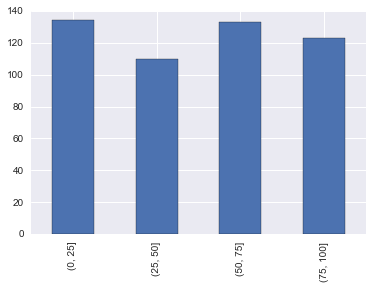

In [30]:
pd.cut(var, [0, 25, 50, 75, 100]).value_counts().plot(kind='bar')

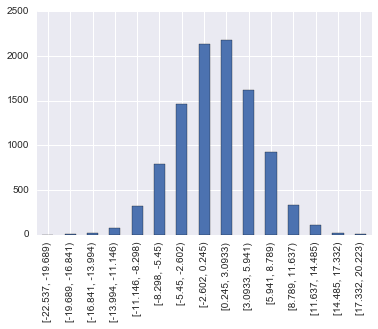

In [32]:
pd.cut(np.random.normal(0.5, 5, 10000), 15, right=False).value_counts().plot(kind='bar')

We find that `.cut(data, bins)` automatically bins values by splitting the range into equal-sized bins.

As a result, the distribution is not uniform.

This is where `qcut` comes in.

#### E. Binning into quantiles

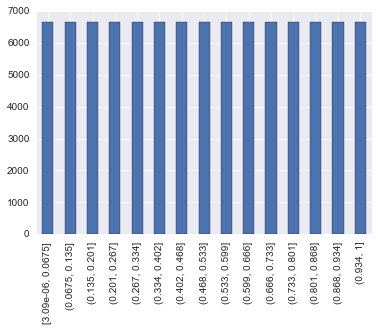

In [35]:
pd.qcut(np.random.random(100000), 15).value_counts().plot.bar()

- pd.cut -> same distributions as the underlying data
- pd.qcut -> uniform distribtion

-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.sample?

## F. Random Sampling

We can use the `np.random.permutation` function (passing nrows as an argument) for randomly reordering a Series.

To select a random sample, create an index and subset the DF using it.
* **Without replacement**: slice off the first _k_ rows; where _k_ is the size of the subset you desire
* **With replacement**: use `np.random.randint(start, stop, size=)` to draw integers at random

In [ ]:
df = DataFrame(np.random.randn(1000, 5), columns=list('ABCDE'))
df[:10]

In [ ]:
df.shape

In [ ]:
s_1k = Series(np.random.permutation(1000))

In [ ]:
np.around(len(df) * 0.74456)

## -  Without Replacement using `permutation`

In [ ]:
# Create a randomized index equal to the length of the DF
sample = np.random.permutation(len(df))

# Subset it to retain only the desired number of cases
train = sample[:np.around(len(df) * 0.7)]

In [ ]:
len(train)

In [ ]:
# Index the DF using this
df_TRAIN = df.loc[train]
print len(train), '\n', df_TRAIN.head()

In [ ]:
train.duplicated().value_counts()


## - With Replacement using `randint`

In [ ]:
Series(np.random.randint(1, 1000, 500)).nunique()

In [ ]:
# WITH REPLACEMENT
repl = np.random.randint(0, 1000, 700)
Series(repl).value_counts()[:10]

In [ ]:
# sample with duplicate rows
# df.ix[repl]

In [ ]:
df.ix[repl].duplicated().value_counts()

## Sampling using `.sample()` method

In [ ]:
# WIthout replacement
df.sample(n=700, replace=False).duplicated().value_counts()

In [ ]:
# WIthout replacement
df.sample(frac=0.7, replace=True).duplicated().value_counts()

---

[June 12]

---

## G. Create Dummies for a Categorical Variable
Create a (n x k) matrix of binary variables from a categorical variable of length n with k levels.

`pd.get_dummies(var)` does this.

In [49]:
df_G = DataFrame({'key': list('bbacccb'),
                 'val': np.random.randn(7) })
df_G

,key,val
0,b,0.066270
1,b,0.144087
2,a,-1.006041
3,c,0.402942
4,c,0.328868
5,c,-1.220034
6,b,-0.499104


In [51]:
pd.get_dummies(df_G['key'], prefix='bool').astype(int)

,bool_a,bool_b,bool_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0


In [56]:
DataFrame({'key': df_G['key']}).assign(dummy_a = lambda x: [i=='a' for i in x['key']],
                                      dummy_b = lambda x: [i=='b' for i in x['key']],
                                      dummy_c = lambda x: [i=='c' for i in x['key']])

,key,dummy_a,dummy_b,dummy_c
0,b,False,True,False
1,b,False,True,False
2,a,True,False,False
3,c,False,False,True
4,c,False,False,True
5,c,False,False,True
6,b,False,True,False


In [52]:
# Create and merge dummies in the same DF
df_G.join(pd.get_dummies(df_G['key'], prefix='dummy'))

,key,val,dummy_a,dummy_b,dummy_c
0,b,0.066270,0.0,1.0,0.0
1,b,0.144087,0.0,1.0,0.0
2,a,-1.006041,1.0,0.0,0.0
3,c,0.402942,0.0,0.0,1.0
4,c,0.328868,0.0,0.0,1.0
5,c,-1.220034,0.0,0.0,1.0
6,b,-0.499104,0.0,1.0,0.0


In [ ]:
# Create a categorical variable from a numeric and then compute dummies
df_G.val = np.random.rand(7)
df_G

In [ ]:
pd.get_dummies(pd.cut(df_G['val'], 3, labels=list('XYZ')), prefix='dummy')

---
## Task

- Create a dataframe with 2 variables called 'Age' and 'Income'. 
- Fill these with random integers between (1, 100) and (10k to 100k) for 'Income'.  Use 10k rows.
- Use cut to bin Age into 5 bins.
- Use qcut to bin Income in to 10 bins. 
- Assign meaningful labels to each.
- Convert both these cut variables into Dummies.
- Report the mean and sum of each dummy variable.

---

In [66]:
df_x = DataFrame({'Age': np.random.randint(1, 100, 6543),
                 'Income': np.random.randint(10000, 100000, 6543)})

In [67]:
df_x = df_x.assign(Age_binned = lambda x: pd.cut(x['Age'], 5, labels=['AgeGrp_' + str(i + 1) for i in range(5)]),
                   Inc_binned = lambda x: pd.cut(x['Income'], 10, labels=['IncGrp_' + str(i + 1) for i in range(10)])
                  )

In [68]:
DataFrame({'Age_Sum': pd.get_dummies(df_x['Age_binned']).sum(), 
 'Age_Mean': pd.get_dummies(df_x['Age_binned']).mean()})

,Age_Mean,Age_Sum
AgeGrp_1,0.200825,1314.0
AgeGrp_2,0.199908,1308.0
AgeGrp_3,0.187070,1224.0
AgeGrp_4,0.208926,1367.0
AgeGrp_5,0.203271,1330.0


In [69]:
DataFrame({'Inc_Sum': pd.get_dummies(df_x['Inc_binned']).sum(), 
 'Inc_Mean': pd.get_dummies(df_x['Inc_binned']).mean()})

,Inc_Mean,Inc_Sum
IncGrp_1,0.110347,722.0
IncGrp_2,0.105303,689.0
IncGrp_3,0.099648,652.0
IncGrp_4,0.099343,650.0
IncGrp_5,0.092160,603.0
IncGrp_6,0.101024,661.0
IncGrp_7,0.099037,648.0
IncGrp_8,0.097356,637.0
IncGrp_9,0.099648,652.0
IncGrp_10,0.096133,629.0


### NUMERIC to CATEGORICAL (via binning) to DUMMIES (via dummification)

In [ ]:
df_G.join(pd.get_dummies(pd.cut(df_G['val'], 3, labels=list('XYZ')), 
                         prefix='dummy')).drop('key', axis=1)

Read: **DUMMY VARIABLE TRAP**

-----------------------------------------------------------------------------------------------------------------------------

## H. String Methods

These include methods applied to string objects that 
* split a string by given delimiter - `.split()`
* trim whitespace - `.strip()`
* concatenate strings - `.join()`
* detect substrings - `.find()` and `.index()`
* count occurrences - `.count()`
* find and replace - `.replace()`


In [83]:
s = 'ready, set ,   go '

In [84]:
# String Splitting
' '.join([x.strip() for x in s.split(',')])

'ready set go'

In [85]:
# Trimming whitespace
pieces = [x.strip() for x in s.split(',')]
pieces
# Also see rstrip, lstrip

['ready', 'set', 'go']

In [87]:
'_#_'.join(list('abcde'))

'a_#_b_#_c_#_d_#_e'

In [88]:
# Concatenating Strings
print '::'.join(pieces)
print '--'.join(pieces)
print ' '.join(pieces)

ready::set::go
ready--set--go
ready set go


In [89]:
# Does a Substring belong to a string
print 'steady' in s
print 'set' in s

False
True


In [92]:
# Locate a substring
s.index('go')

15

In [93]:
s[15:17]

'go'

In [94]:
sentence = 'the sun rises in the east'

In [98]:
sentence.index('east') == sentence.find('east')

True

In [100]:
print sentence.index('west')

ValueError: substring not found

In [101]:
print sentence.find('west')

-1


In [102]:
sentence[21:]

'east'

In [103]:
sentence.find('ris')

8

In [104]:
sentence.count('t')

3

In [105]:
# Locate a substring
s.find(',')

5

In [106]:
# Count occurrences
s.count(',')

2

In [107]:
sentence.endswith('east')

True

In [108]:
s2 = 'the quick brown fox jumps over the lazy dog'
s2.find('fox')

print 'lazy' in s2

print s2.endswith('dog')

True
True


In [110]:
s.startswith('ready')
# similarly .endswith()a

True

-----------------------------------------------------------------------------------------------------------------------------

### I. Regular Expressions

A Regex is a sequence of characters that define a search pattern used in find-and-replace actions.

Example: The regex
* `\s+` describes one or more whitespaces
* `(?<=\.) {2,}(?=[A-Z])` matches at least two spaces occurring after period (.) and before an upper case letter

Note:
* Before a regex is applied to a string, it must be _compiled_ to create a reusable regex object.
* The object's methods can then be called on a string.
* These include: 
    * **`split`**, 
    * **`findall`** (returns all matches), 
    * **`match`** (checks only the beginning of the string), 
    * **`search`** (returns the first occurrence)
    * **`sub`** (returns a new string with occurrences of the pattern replaced with the supplied string)

Syntax:
1. `import re`
2. `r_obj = re.compile('my-regex')`
3. `r_obj.method(my-text)`


-----------------------------------------------------------------------------------------------------------------------------

---
# Ch. 8 Plotting and Visualization

---

## 1. matplotlib basics


* Run **`import matplotlib.pyplot as plt`**
* Create a figure object using **`plt.figure`**
* Add subplots to it using **`add_subplot`**
    * This creates **AxesSubplot** objects on which you can place plots
* Use a plotting command like **`plt.plot`** and matplotlib will place your plot on this canvas


### 1.1 Figure, Subplots, AxisSubplot objects and your plot

#### Create a 2x2 figure and add three plots to it


In [121]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [122]:
plt.figure?

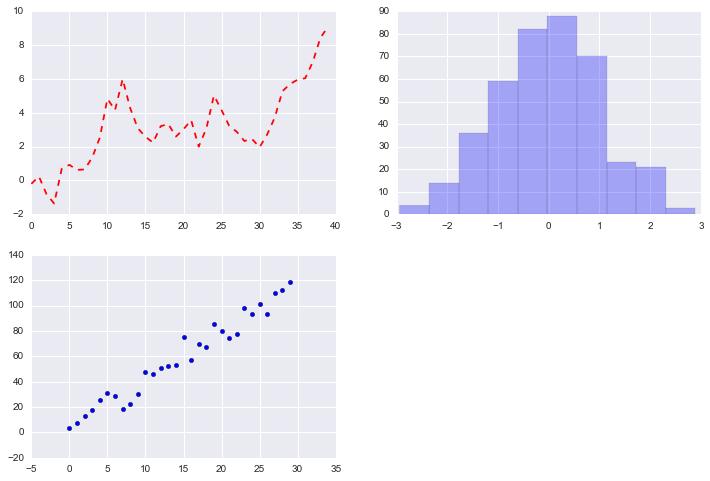

In [133]:
# Create an empty figure
fig = plt.figure(figsize=(12, 8))

# Run plt.figure? to check out figure options like size, dpi, color

axsp1 = fig.add_subplot(2, 2, 1)
# There will be 2 x 2 subplots on the figure and ax1 will put your figure on subplot 1

axsp2 = fig.add_subplot(2, 2, 2)
axsp3 = fig.add_subplot(2, 2, 3)
# Now, we have three AxesSubplot objects on our figure. 

# First plot: timeseries
axsp1.plot(np.random.randn(40).cumsum(), 'r--')

# Second plot: histogram
axsp2.hist(np.random.randn(400), bins=10, color='b', alpha=0.3)

# Third plot: scatterplot
axsp3.scatter(np.arange(30), 4 * np.arange(30) + 6 * np.random.randn(30))
# Note: if you make changes to the AxisSubplot object, you'll have to re-run the commands above

------------------------------------------------------------------------------------------------------------------------

### 1.2 Shorthand to achieve the same effect

* Create a grid figure using **`plt.subplots`**
    * Syntax: `fig, axes = plt.subplots(rows, cols, figsize = (width, height), sharex=False, sharey=False)`
    
* It returns an array of **AxisSubplot** objects 
* Reference them using basic indexing (Saves typing!)

`plt.subplots` has some interesting options such as `sharex/sharey` which are useful when comparing data on the same scale

Run `plt.subplots?` for more.

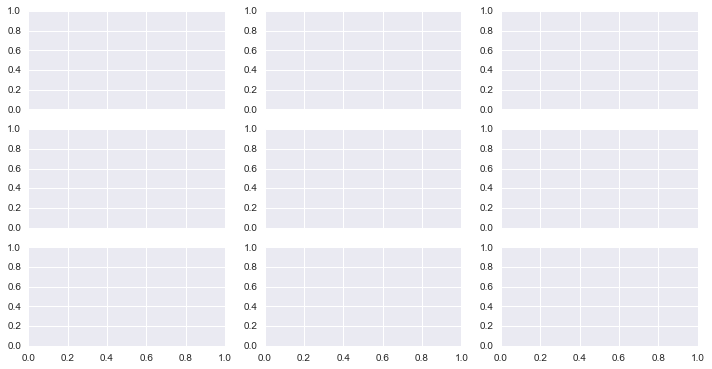

In [137]:
fig, axes = plt.subplots(3, 3, figsize = (12, 6), sharex=True)
# returns an array

In [138]:
axes[1, 1].plot(np.random.randn(50).cumsum(), 'r--')
axes[2, 1].scatter(np.arange(30), np.log10(np.arange(30)))

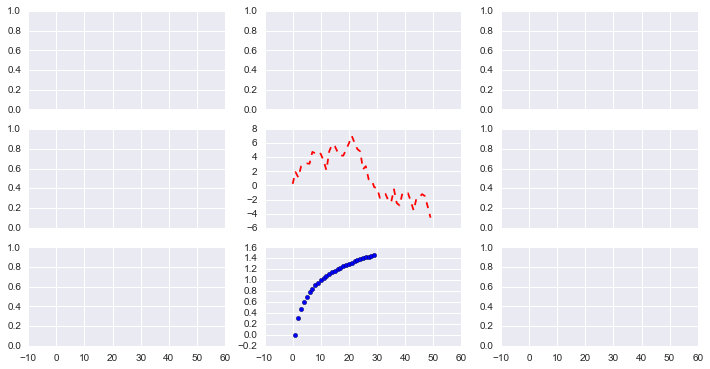

In [139]:
fig

> NOTE:
`subplots.adjust` is a Figure method that can be used to adjust figure parameters like spacing between subplots

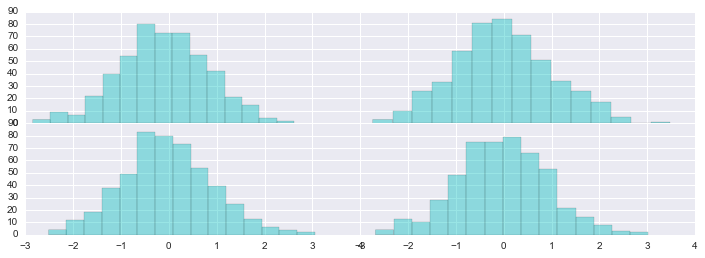

In [146]:
fig1, axes1 = plt.subplots(2, 2, figsize=(12, 4), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes1[i, j].hist(np.random.randn(500), bins=15, alpha=0.4, color='c')
plt.subplots_adjust(wspace=0, hspace=0)
# comment out the plt.subplots line and re-run. See what happens

------------------------------------------------------------------------------------------------------------------------

### 1.3 Plot Formatting

#### a. Color, Linestyle and Markers

The `plot` function takes `x, y` and optionally an abbreviation to specify `marker, color, and style`

Example: Abbreviations work as `color-marker-style`, so `'g--'` means color = 'green' and linestyle = '--'

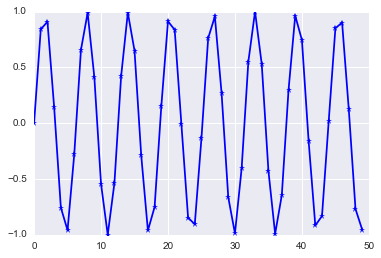

In [149]:
plt.plot(np.sin(np.arange(50)), 'b*-')

#### b. Ticks, Labels, Legends

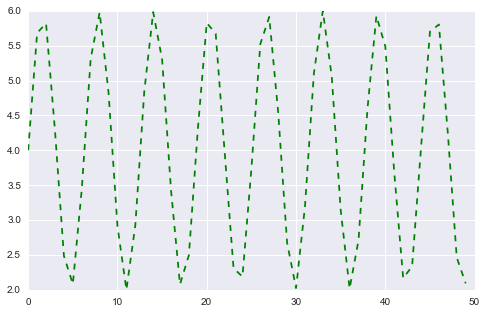

In [150]:
f = plt.figure(figsize=(8, 5))
ax1 = f.add_subplot(1, 1, 1)
ax1.plot(4 + 2 * np.sin(np.arange(50)), 'g--', label='4 + 6*sin(x)')

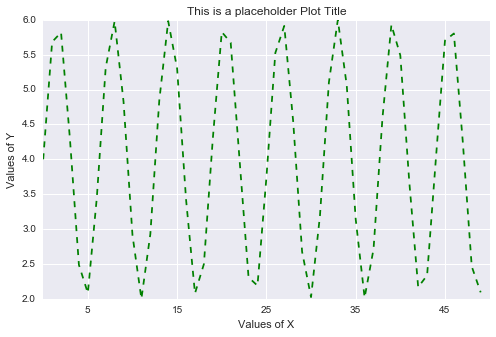

In [151]:
# Ticks
ax1.set_xticks([5, 15, 25, 35, 45])

# Chart title
ax1.set_title('This is a placeholder Plot Title')

# Axis Label
ax1.set_xlabel('Values of X')
ax1.set_ylabel('Values of Y')

f

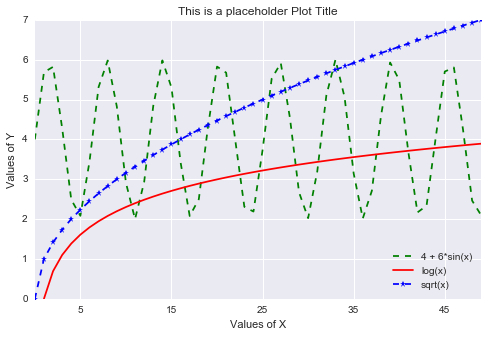

In [152]:
# Add more plots
ax1.plot(np.log(np.arange(50)), 'r', label='log(x)')
ax1.plot(np.sqrt(np.arange(50)), 'b*--', label='sqrt(x)')
# Add a legend
ax1.legend(loc='best')

f

### 1.3 Saving plots to file

**Syntax**: `plt.savefig('file-path.extension', dpi=)`

------------------------------------------------------------------------------------------------------------------------

In [154]:
Series.plot?

# 2. Plotting in `pandas`

* There are high level plotting methods that take advantage of the fact that data are organized in DataFrames (have index, colnames)
* Both `Series` and `DataFrame` objects have a `pandas.plot` method for making different plot types
* Other parameters that can be passed to `pandas.plot` are:
    * `xticks, xlim, yticks, ylim`
    * `label`
    * `style` (as an abbreviation,) and `alpha`
    * `grid=True`
    * `rot` (rotate tick labels by and angle 0-360)
    * `use_index` (use index for tick labels)

### 2.1 One variable (plotting a Series)

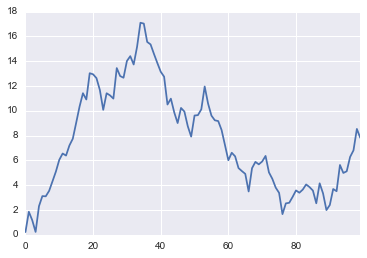

In [159]:
s = Series(np.random.randn(100).cumsum())

s.plot()
# Default is a line chart

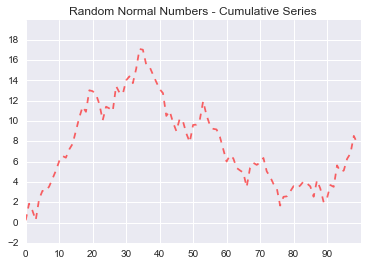

In [163]:
# Chart with options
s.plot(kind='line',
       grid=True, 
       legend=False,
       label='timeseries',
       title='Random Normal Numbers - Cumulative Series',
       xlim=(0, 100), 
       ylim=(-2, 20),
       xticks=np.arange(0, 100, 10), 
       yticks=np.arange(-2, 20, 2),
       style='r--', 
       alpha=0.6
      )

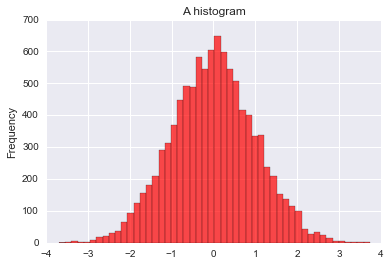

In [164]:
# One Variable as a Histogram
Series(np.random.randn(10000)).plot(kind='hist', 
                                    bins=50, 
                                    color='r', 
                                    alpha=0.7, 
                                    title='A histogram')

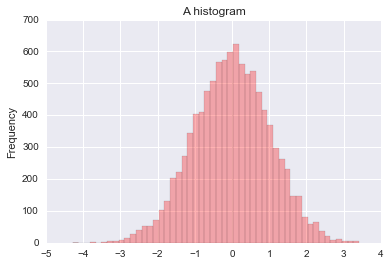

In [166]:
# One Variable as a Histogram
Series(np.random.randn(10000)).plot.hist(bins=50, 
                                         color='r', 
                                         alpha=0.3, 
                                         title='A histogram')

In [169]:
from scipy.stats import norm

s2 = norm.rvs(size=10000, loc=4, scale=0.5)
s3 = norm.rvs(size=10000, loc=-2, scale=1.5)

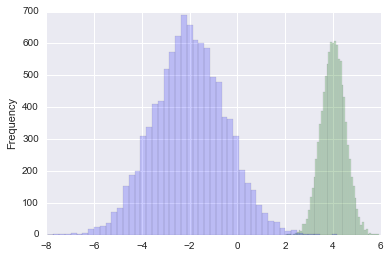

In [170]:
Series(s2).plot(kind='hist', bins=50, color='g', alpha=0.2)
Series(s3).plot(kind='hist', bins=50, color='b', alpha=0.2)
plt.savefig('twoHistograms.jpeg')

['.ipynb_checkpoints', 'Pandas-1.ipynb', 'Pandas-2.ipynb', 'pandas_Part1_v2.docx', 'pandas_Part2_v2.docx', 'Pandas_Slides.slides.html', 'train.csv', 'twoHistograms.jpeg']


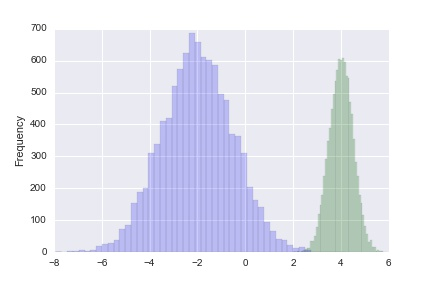

In [173]:
import os
print os.listdir(os.getcwd())

from IPython.display import Image
Image('twoHistograms.jpeg')

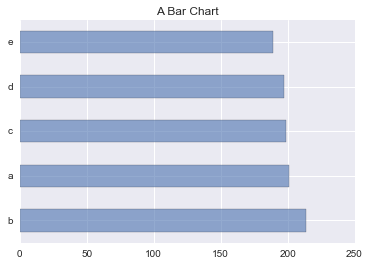

In [182]:
(Series(pd.cut(np.random.randint(1, 100, 1000), 5, labels=list('abcde')))
 .value_counts()
 .plot.barh(title='A Bar Chart',
          ylim=(0, 400),
          alpha=0.6))

------------------------------------------------------------------------------------------------------------------------

### 2.2 Multiple Variables (plotting a DataFrame)

We can choose between plotting
* All Variables on one plot
* Each variable on a separate plot

In addition to the parameters above, `DataFrame.plot` also takes
* `subplots=False` (default is to plot all on the same figure)
* `sharex=False, sharey=False`
* `figsize`
* `title, legend`
* `sort_columns`

### a. Variables on the same plot

In [184]:
df = DataFrame(np.random.randn(5000, 5), columns=list('PQRST')); df[:5]

,P,Q,R,S,T
0,0.195422,0.492725,-0.003239,0.593395,2.210316
1,0.534652,-0.748390,-0.443950,1.461945,-1.027695
2,1.673777,0.247307,1.074514,-0.180180,0.184387
3,-1.110466,1.564234,-0.590981,-1.428181,1.726188
4,0.726808,-0.566637,-1.063218,-0.242180,-1.021351


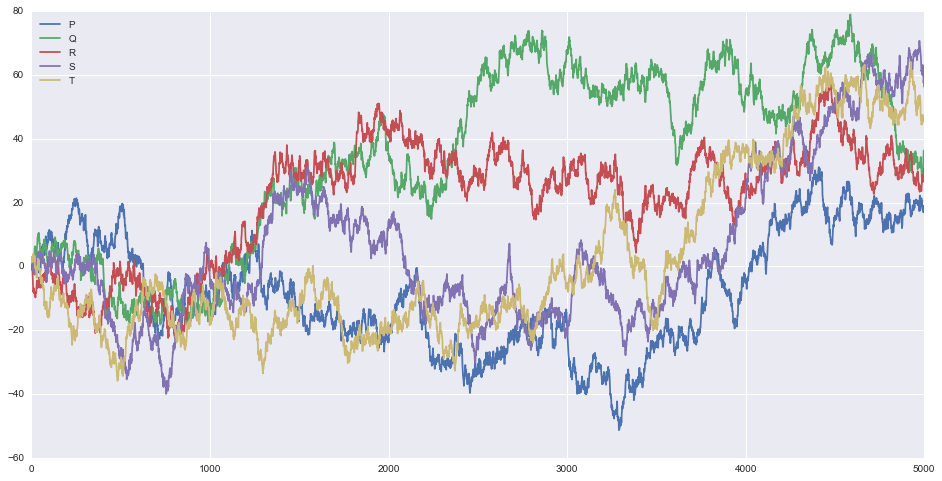

In [190]:
# Default plot
df.cumsum().plot(figsize=(16, 8))

------------------------------------------------------------------------------------------------------------------------

### b. Each variable on its own plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128069090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x123e78190>], dtype=object)

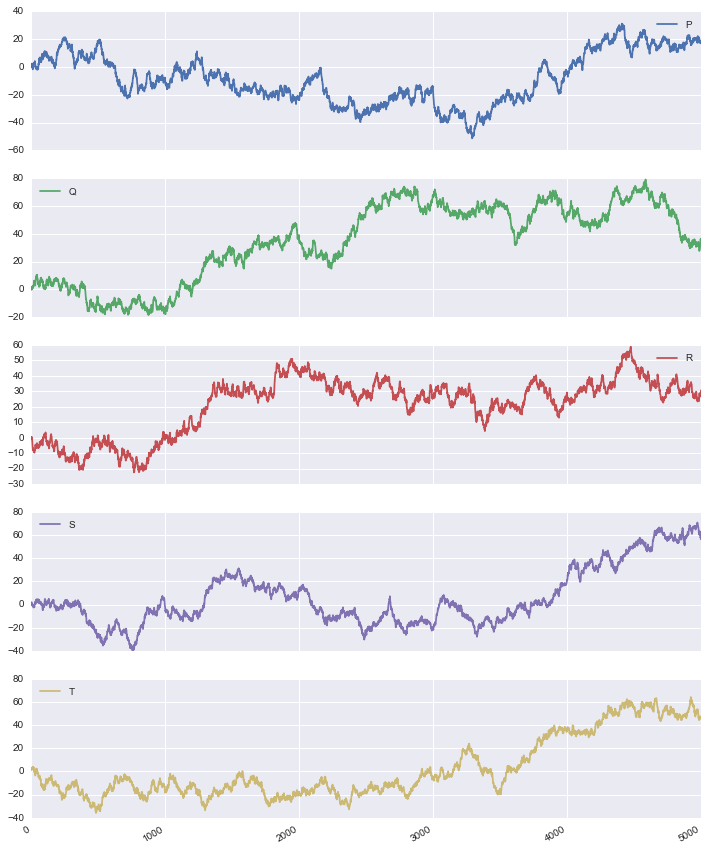

In [193]:
df.cumsum().plot(figsize=(12, 16), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1297d30d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12a4580d0>], dtype=object)

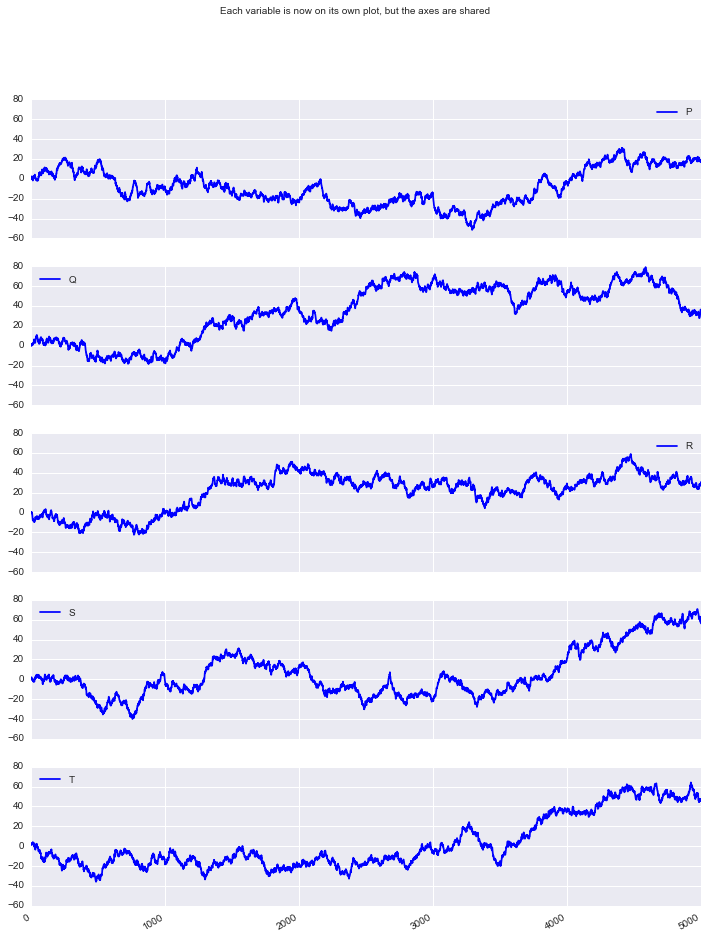

In [197]:
# Let's make some radical changes
df.cumsum().plot(kind='line',
        figsize=(12, 16),
        title='Each variable is now on its own plot, but the axes are shared',
        color='b',
        subplots=True, 
        sharex=True,
        sharey=True
       )

------------------------------------------------------------------------------------------------------------------------

### c. Barplots

This is as simple as passing `kind=bar` or `kind=barh` (for horiz bars) to `pd.plot`

#### One Variable (simple barplot)

In [ ]:
import matplotlib.pyplot as plt

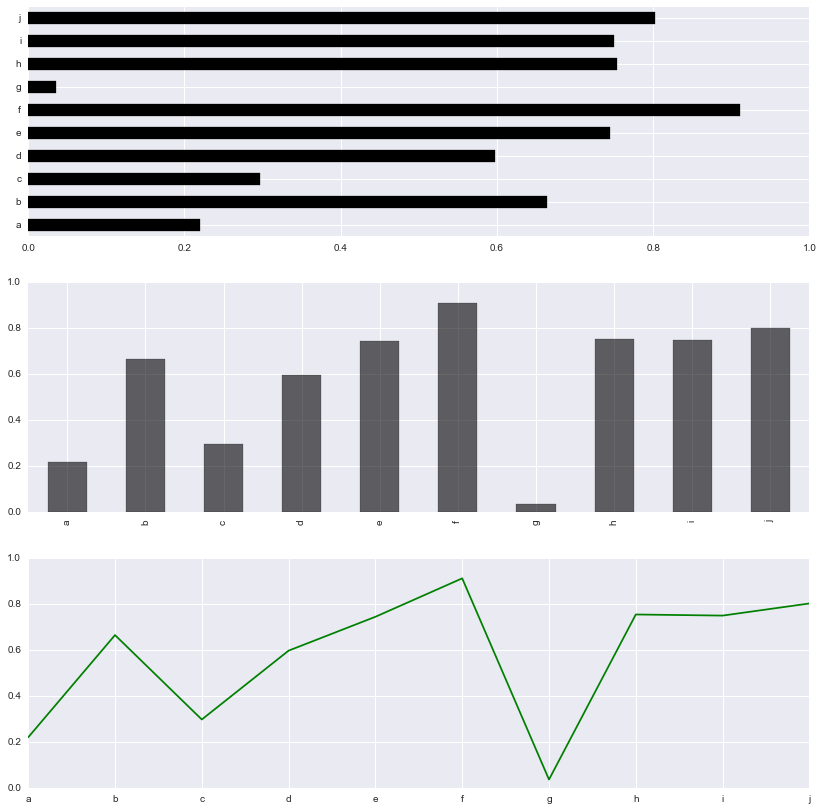

In [201]:
fig, axes = plt.subplots(3, 1, figsize=(14, 14))
s = Series(np.random.rand(10), index=list('abcdefghij'))

s.plot(kind='bar', 
       ax=axes[1], 
       color='k', 
       alpha=0.6)

s.plot(kind='barh', 
       ax=axes[0], 
       color='k')

s.plot(
    ax=axes[2], 
    color='g')

In [202]:
df = DataFrame(np.random.rand(5,5), index=list('ABCDE'), columns=list('PQRST'))
print df

          P         Q         R         S         T
A  0.743414  0.798967  0.374729  0.688393  0.534807
B  0.241646  0.387887  0.183361  0.532998  0.537139
C  0.273048  0.223901  0.846959  0.955276  0.562555
D  0.334527  0.361607  0.717560  0.198250  0.271168
E  0.624749  0.036052  0.093826  0.572672  0.871748


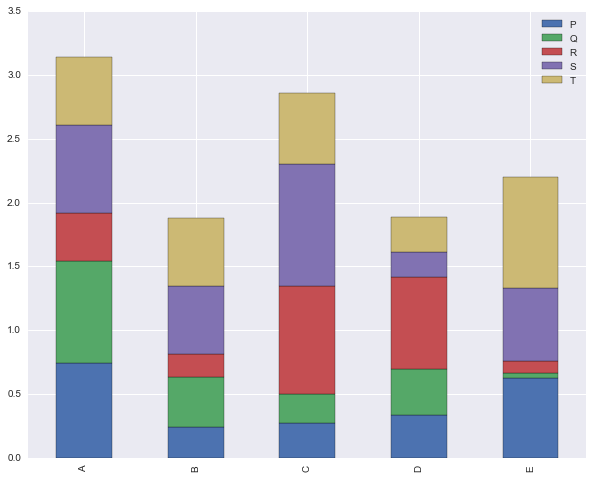

In [204]:
df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.savefig('stackedBarcharts.jpeg')

> Note: Functions `value_counts()` and `pd.crosstab()` prove helpful to prepare data for stacked bar charts

------------------------------------------------------------------------------------------------------------------------

### d. Histograms & Density Plots

* _Histograms_: Pass `kind='hist'` to `pd.plot()` or use the method `pd.hist()`
* _Density Plots_: Use `kind='kde'`


### Using the `.hist()` method

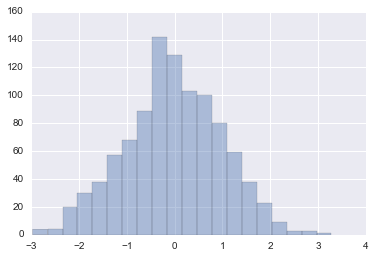

In [205]:
Series(np.random.randn(1000)).hist(bins=20, alpha=0.4)

### Using the `.plot()` method

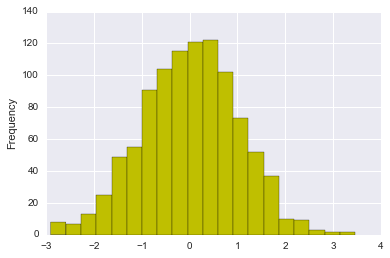

In [208]:
Series(np.random.randn(1000)).plot(kind='hist', bins=20, color='Y')

### KDE

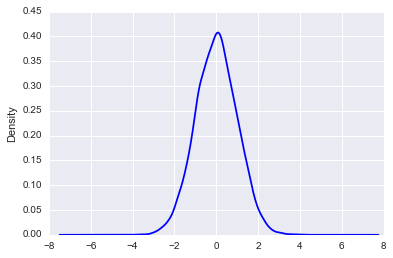

In [214]:
s = Series(np.random.randn(10000))
s.plot(kind='kde', color='b') 

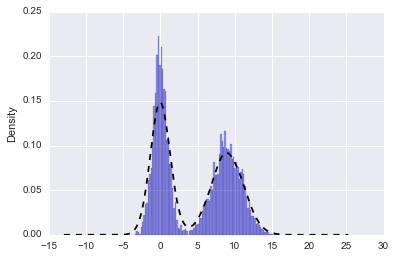

In [217]:
# A bimodal distribution 
s1 = np.random.normal(0, 1, 2000)
s2 = np.random.normal(9, 2, 2000)

v = Series(np.concatenate([s1, s2]))

v.hist(bins=100, alpha=0.4, color='B', normed=True)
v.plot(kind='kde', style='k--')

------------------------------------------------------------------------------------------------------------------------

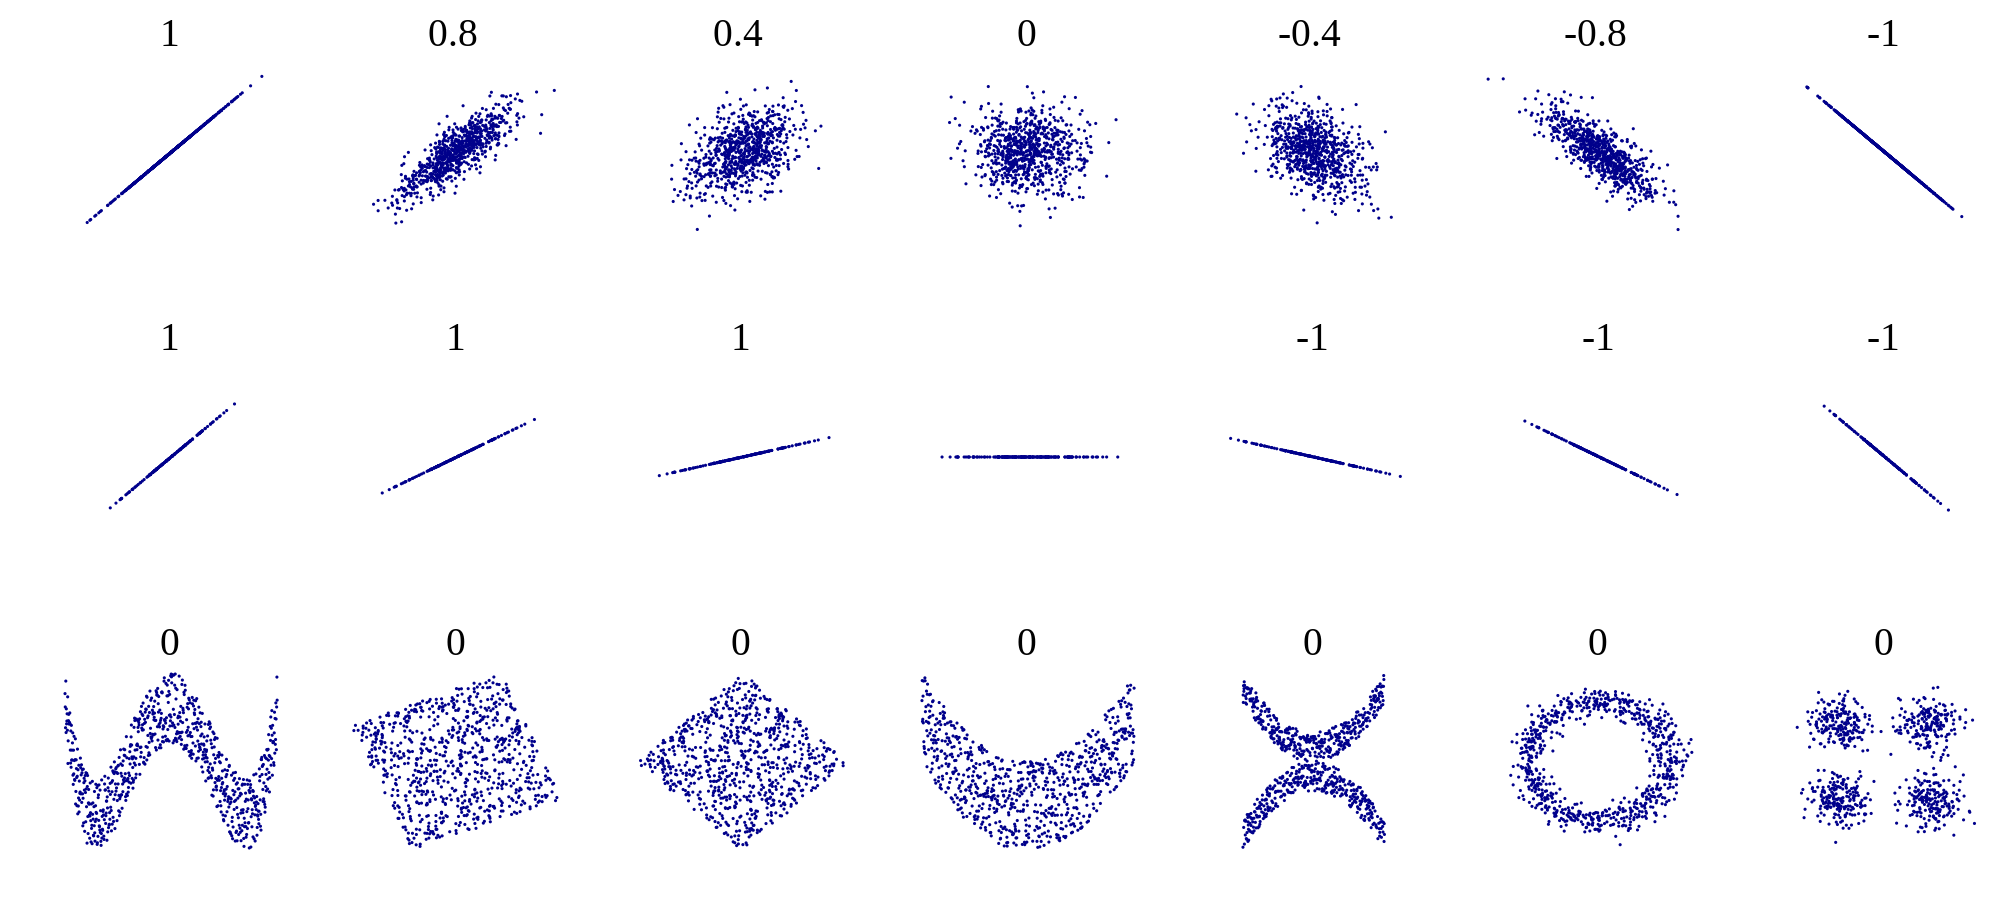

In [231]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2000px-Correlation_examples2.svg.png")

# e. Scatter Plots

- `.plot(kind='scatter')`
- `.scatter()`

In [232]:
df = DataFrame({'A': np.arange(50),
               'B': np.arange(50) + np.random.randn(50),
               'C': np.sqrt(np.arange(50)) + np.sin(np.arange(50)) })
print df[:10]

   A         B         C
0  0 -0.191895  0.000000
1  1 -0.745908  1.841471
2  2  2.179937  2.323511
3  3  3.676659  1.873171
4  4  4.102888  1.243198
5  5  5.598402  1.277144
6  6  6.706565  2.170074
7  7  6.863723  3.302738
8  8  9.191105  3.817785
9  9  7.346206  3.412118


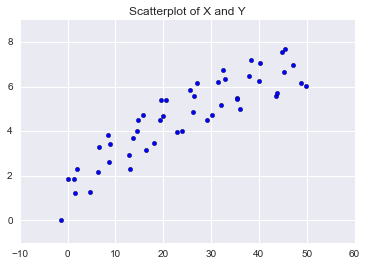

In [219]:
# Two variable Scatterplot
plt.scatter(df['B'], df['C'])
plt.title('Scatterplot of X and Y')

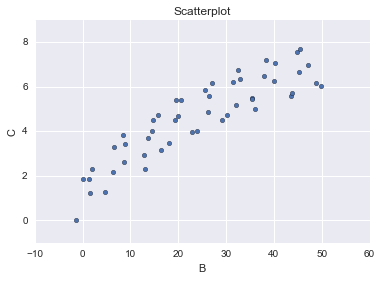

In [220]:
df.plot(kind='scatter', x='B', y='C', title = 'Scatterplot')

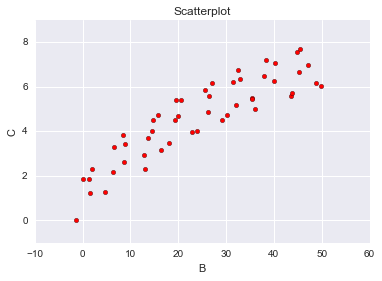

In [222]:
df.plot.scatter(x='B', y='C', title = 'Scatterplot', color='r')

## Scatterplot Matrix

A MOST important visual that allows you to see, for numeric variables:

- The distribution of each (histograms or kde along the diagonal)
- The relationships between variables (as pairwise scatterplots)

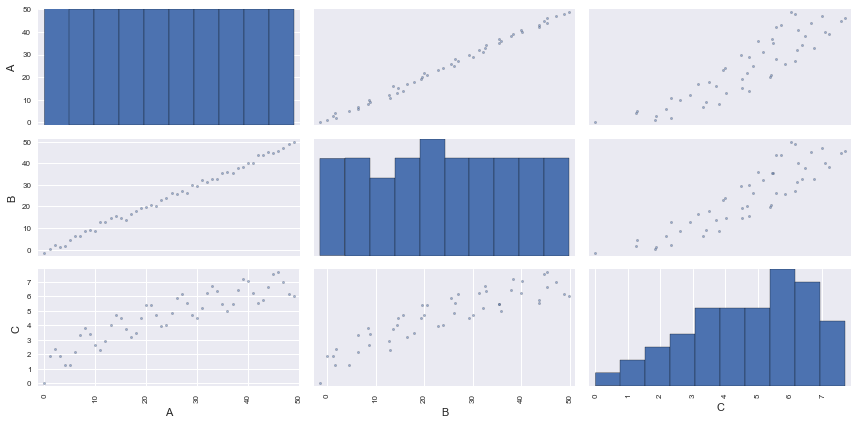

In [228]:
pd.scatter_matrix(df, color='k', alpha=0.5, figsize=(12, 6))
tight_layout()

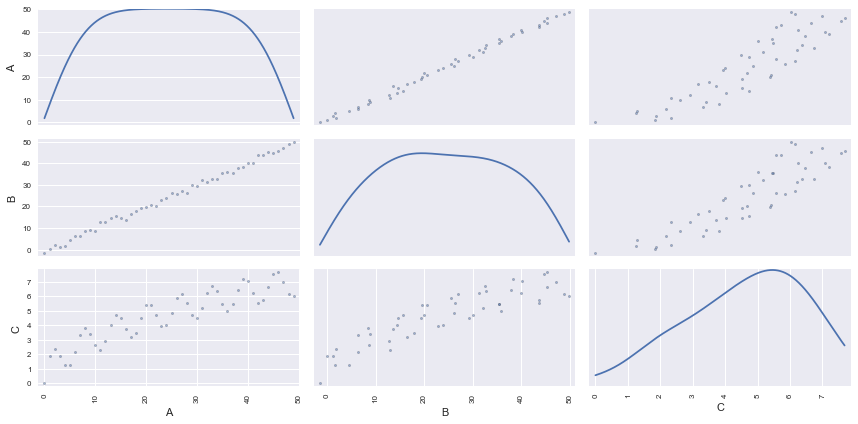

In [229]:
pd.scatter_matrix(df, diagonal='kde', color='k', alpha=0.5, figsize=(12, 6))
tight_layout()

------------------------------------------------------------------------------------------------------------------------

# _Split - Apply - Combine_!

In Data Analysis workflows, operations like `loading, cleaning and merging` are usually following by `summarizations` using some grouping variable(s). This includes _summary statistics_ over variables or groups within variables, within-group _transformations_ (like variable standardization), computing _pivot-tables_ and group analyses.

* _Split:_
    * A DataFrame can be split up by rows(`axis=0`)/columns(`axis=1`) into **groups**. 
    * We use `pd.groupby()` to create a groupby object
* _Apply:_
    * A function is applied to each group.
* _Combine:_
* The results of applying functions to groups are put together into an object 
    * data types of returned objects are handled gracefully by pandas
    


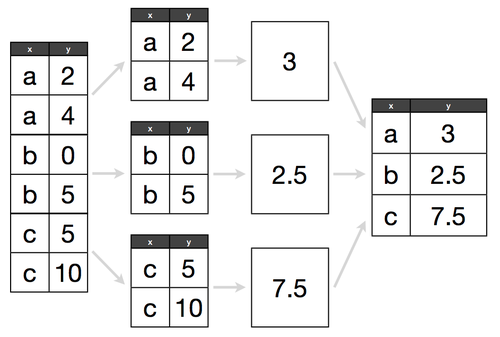

In [230]:
from IPython.display import Image
Image("http://i.imgur.com/yjNkiwL.png")

In [234]:
df = DataFrame({'k1': list('abcd' * 25),
               'k2': list('xy' * 25 + 'yx' * 25),
               'v1': np.random.rand(100),
               'v2': np.random.rand(100)}); df[:15]

,k1,k2,v1,v2
0,a,x,0.190282,0.930499
1,b,y,0.385818,0.499365
2,c,x,0.230238,0.098682
3,d,y,0.067014,0.197188
4,a,x,0.994339,0.906367
5,b,y,0.684445,0.188850
6,c,x,0.671729,0.721023
7,d,y,0.507423,0.726439
8,a,x,0.159004,0.366179
9,b,y,0.789885,0.172454


#### Syntax

`df.groupby('[<col-name(s)>]').apply(<udfs>) or <existing-function>`

### Grouping by one key 

**Results in a summarized data frame indexed by levels of the key**

In [235]:
print '\n', df.groupby('k1').mean()
print '\n', df.groupby('k2').sum()


          v1        v2
k1                    
a   0.460856  0.556793
b   0.524382  0.461791
c   0.321363  0.561577
d   0.448137  0.416509

           v1         v2
k2                      
x   23.843496  26.118004
y   20.024942  23.798744


### Grouping by two keys

**Results in a summarized data frame with a hierarchical index**

In [238]:
print df.groupby(['k1', 'k2']).mean()

             v1        v2
k1 k2                    
a  x   0.475025  0.578652
   y   0.445506  0.533112
b  x   0.585562  0.480170
   y   0.467908  0.444827
c  x   0.360693  0.541123
   y   0.285058  0.580456
d  x   0.485624  0.487693
   y   0.407526  0.339393


In [239]:
grpd = df.groupby(['k1', 'k2'])

In [240]:
type(grpd)

pandas.core.groupby.DataFrameGroupBy

In [274]:
print grpd['v1'].sum()
print
print grpd['v2'].median()

grpd.agg({'v1': 'mean',
          'v2': 'sum'
         })

k1  k2
a   x     6.175327
    y     5.346073
b   x     7.026746
    y     6.082810
c   x     4.328313
    y     3.705752
d   x     6.313110
    y     4.890306
Name: v1, dtype: float64

k1  k2
a   x     0.591047
    y     0.651538
b   x     0.469216
    y     0.364192
c   x     0.585622
    y     0.756357
d   x     0.494000
    y     0.267418
Name: v2, dtype: float64


v1        v2
k1 k2                    
a  x   0.475025  7.522472
   y   0.445506  6.397346
b  x   0.585562  5.762040
   y   0.467908  5.782745
c  x   0.360693  6.493482
   y   0.285058  7.545932
d  x   0.485624  6.340010
   y   0.407526  4.072722

In [249]:
all(grpd['v1'].sum() == grpd['v1'].apply(np.sum))

True

---
# ** GroupBy objects **

* `DataFrame.groupby(<key>)` will produce a groupby object
* have a `.size()` method, which returns the count of elements in each group.
* can be subsetted using column names (or arrays of column names) to select variables for aggregation
* have optimized methods for general aggregation operations like - 
    * `count, sum`
    * `mean, median, std, var`
    * `first, last`
    * `min, max`
* methods like `.describe` apply to these objects

** By far, the most important GroupBy methods are `.agg() .transform()`, and `.apply()` **

In [253]:
obj = df.groupby(['k1'])

In [254]:
obj

In [255]:
obj.size()

k1
a    25
b    25
c    25
d    25
dtype: int64

In [256]:
print obj.mean()

          v1        v2
k1                    
a   0.460856  0.556793
b   0.524382  0.461791
c   0.321363  0.561577
d   0.448137  0.416509


### Groupby objects Methods

In [257]:
obj.agg?

---
### Task 1: 

1. Create a 100x4 DataFrame filled with random numbers (from a normal distribution.)
Ensure that there's 2 categorical columns with 5 and 3 categories each.

2. Create the groupby object using both keys and find the mean, max, median for each group.

---

### 9.1 Column-wise aggregations and UDFs

** For simple aggregations (Series or all numeric columns of a DataFrame) we can call methods like `mean` and `sum` **

In [259]:
# Summing a Series
# Syntax: Select a Series - GroupBy - Apply function
df['v1'].groupby(df['k1']).sum()

k1
a    11.521401
b    13.109556
c     8.034065
d    11.203416
Name: v1, dtype: float64

In [260]:
# Summing all Series of a DataFrame
# Syntax: Select DF - Groupby - Apply
print df.groupby('k2').mean()

          v1        v2
k2                    
x   0.476870  0.522360
y   0.400499  0.475975


** or you can pass the name of a function as a string with the `.agg()` method **

In [261]:
df['v1'].groupby(df['k1']).agg('sum')

k1
a    11.521401
b    13.109556
c     8.034065
d    11.203416
Name: v1, dtype: float64

In [262]:
print df.groupby(df.k1).agg('mean').add_prefix('mu_')

       mu_v1     mu_v2
k1                    
a   0.460856  0.556793
b   0.524382  0.461791
c   0.321363  0.561577
d   0.448137  0.416509


In [263]:
pd.concat([df.groupby(df.k1).agg('mean').add_prefix('mu_'),
           df.groupby(df.k1).agg('std').add_prefix('sigma_')], axis=1)

,mu_v1,mu_v2,sigma_v1,sigma_v2
k1,,,,
a,0.460856,0.556793,0.299779,0.293676
b,0.524382,0.461791,0.285752,0.342295
c,0.321363,0.561577,0.211798,0.343457
d,0.448137,0.416509,0.311893,0.312415


---
### The `.agg()` method

takes as argument the following:
* list of function names to be applied to all selected columns
* tuples of (colname, function) to be applied to all selected columns
* dict of (df.col, function) to be applied to each df.col

** 1. Apply >1 functions to selected column(s) by passing names of functions to `agg()`**

In [264]:
# Apply min, mean, max and max to v1 grouped by k1
df.groupby('k1').agg(['min', 'mean', 'max'])

v1                            v2                    
         min      mean       max       min      mean       max
k1                                                            
a   0.019163  0.460856  0.994339  0.013982  0.556793  0.950084
b   0.081857  0.524382  0.944964  0.003286  0.461791  0.987295
c   0.039058  0.321363  0.731756  0.019883  0.561577  0.972558
d   0.000155  0.448137  0.964356  0.005965  0.416509  0.981704

In [267]:
# Apply min and max to all numeric columns of df grouped by k2
df.groupby('k1')[['v1', 'v2']].agg(['min', 'max'])

v1                  v2          
         min       max       min       max
k1                                        
a   0.019163  0.994339  0.013982  0.950084
b   0.081857  0.944964  0.003286  0.987295
c   0.039058  0.731756  0.019883  0.972558
d   0.000155  0.964356  0.005965  0.981704

In [269]:
# Hierarchical index will be created
# We can call .stack on the returned object!

df[['v1', 'v2']].groupby(df['k2']).agg(['min', 'max']).stack()

v1        v2
k2                        
x  min  0.000155  0.003286
   max  0.994339  0.959651
y  min  0.019163  0.005965
   max  0.942850  0.987295

### 2. We can supply names for the columns in the aggregated df

to the agg() method, in a list of tuples as `[(colname1, func1), (colname2, func2) ...] `

In [270]:
print df.groupby('k1')[['v1', 'v2']].agg([('smallest', 'min'), ('largest', 'max')])

          v1                  v2          
    smallest   largest  smallest   largest
k1                                        
a   0.019163  0.994339  0.013982  0.950084
b   0.081857  0.944964  0.003286  0.987295
c   0.039058  0.731756  0.019883  0.972558
d   0.000155  0.964356  0.005965  0.981704


### 3. We can supply df columns and which funcs to apply to each

to the agg() method in a dictionary

In [272]:
# Apply max and min to v1; and mean and sum to v2; all grouped by k1
print df[['v1', 'v2']].groupby(df['k1']).agg({'v1': ['max', 'min'], 
                                              'v2': ['mean', 'sum']})

          v1                  v2           
         max       min      mean        sum
k1                                         
a   0.994339  0.019163  0.556793  13.919817
b   0.944964  0.081857  0.461791  11.544786
c   0.731756  0.039058  0.561577  14.039414
d   0.964356  0.000155  0.416509  10.412732


---
### The `.apply()` method

takes as argument the following:
* a general or user defined function
* any other parameters that the function would take

In [ ]:
df.groupby('k1').apply?

In [275]:
def topN(data, col, N):
    return data.sort_values(by=col, ascending=False).loc[:, col].head(N)

In [276]:
df.groupby('k2').apply(topN, col='v1', N=3)

k2    
x   4     0.994339
    99    0.964356
    44    0.956505
y   39    0.942850
    13    0.859481
    43    0.800450
Name: v1, dtype: float64

In [277]:
df.groupby('k1').apply(topN, col='v2', N=2)

k1    
a   96    0.950084
    0     0.930499
b   41    0.987295
    97    0.938344
c   90    0.972558
    50    0.929327
d   35    0.981704
    59    0.959651
Name: v2, dtype: float64

In [278]:
def analyze(df):
    return pd.Series({"nrow": len(df), "ncol": len(df.columns)})

In [279]:
# Rows and Cols per group
print df.groupby("k1").apply(analyze)

    ncol  nrow
k1            
a      4    25
b      4    25
c      4    25
d      4    25


---
## Time Series Functions

In [280]:
dates = pd.date_range('1950-01', '2013-03', freq='M'); dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28'],
              dtype='datetime64[ns]', length=758, freq='M')

In [281]:
ts = DataFrame(np.random.randn(758, 4), columns=list('ABCD'), index=dates)

In [282]:
ts.head()

,A,B,C,D
1950-01-31,-0.749910,0.352303,-0.035532,0.229034
1950-02-28,0.595296,-0.317314,-2.264777,-0.955191
1950-03-31,0.536632,2.090934,0.747100,-1.477979
1950-04-30,-1.352161,-0.146484,1.109179,0.351890
1950-05-31,-0.768021,0.109881,0.269931,0.554622


In [283]:
ts['year'] = ts.index.year

In [284]:
ts.head()

,A,B,C,D,year
1950-01-31,-0.749910,0.352303,-0.035532,0.229034,1950
1950-02-28,0.595296,-0.317314,-2.264777,-0.955191,1950
1950-03-31,0.536632,2.090934,0.747100,-1.477979,1950
1950-04-30,-1.352161,-0.146484,1.109179,0.351890,1950
1950-05-31,-0.768021,0.109881,0.269931,0.554622,1950


In [285]:
# Aggregating data by year
print ts.groupby('year').sum().tail(20)

             A         B         C         D
year                                        
1994 -3.247397 -0.532978  2.955480 -5.508247
1995  1.334588 -1.434210 -3.610088  0.634792
1996 -1.807166  3.144071 -2.100947 -1.501893
1997  2.928748 -3.363788 -1.600708  0.008250
1998 -2.006754 -3.178807  0.316113  8.773664
1999  4.061652 -0.566998 -4.102184 -0.029361
2000  6.325306 -1.486406  1.259281 -8.819101
2001  1.443642 -4.286418 -4.068241  5.177543
2002  1.931868 -0.998288  1.513567 -0.737073
2003  5.110073 -3.321084  2.779953 -3.028895
2004  4.391137  4.857390 -1.748087 -2.971212
2005 -3.294126  0.113746  2.780659  3.516937
2006  1.808554 -1.622890  0.113134  1.256681
2007 -3.196824 -0.713386  3.790086  3.319966
2008 -2.231623  1.709160 -3.831278 -0.056781
2009  2.791313 -4.918597  1.158988  0.400174
2010 -1.927201 -3.080373  1.950383  2.287198
2011  0.405902 -3.390017  0.005565  7.363329
2012 -0.087232  1.140127  1.491159  5.250759
2013 -1.319170 -0.804372  0.854948  1.165003


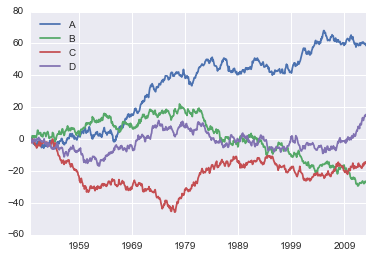

In [286]:
# Visualize Trends over time
ts.drop('year', axis=1).cumsum().plot()

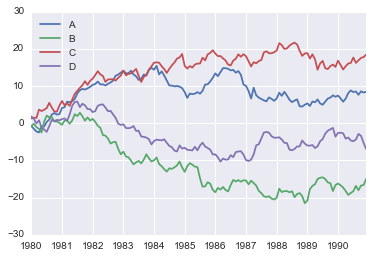

In [287]:
# Subsetting data for a decade
ts['1980':'1990'].drop('year', axis=1).cumsum().plot()

---
### Groupby Practice Tasks - Baseball Data

1. Import the data from this link http://bit.ly/144sh7t (hint: use read_csv) Call it `baseball`
2. Check column types, dataframe shape
3. How many rows have missing data? 
3. Find the proportion of missing values in each column
4. Find
    - The number of rows in every league
    - The count of records per year
    - Average, Median experience of players participating in each year

In [ ]:
baseball = pd.read_csv("http://bit.ly/144sh7t")

In [ ]:
baseball.columns.values